<a href="https://colab.research.google.com/github/NiloferMubeen/Deep_learning/blob/main/Image_classification_Ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

Listing the Available devices

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

Loading the dataset

In [4]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [5]:
X_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [6]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Plotting the samples

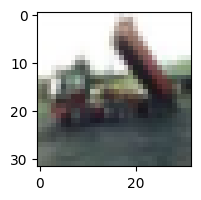

In [7]:
def plot_images(index):
  plt.figure(figsize=(2,2))
  plt.imshow(X_train[index])

plot_images(2)

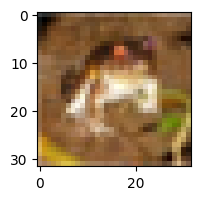

In [8]:
plot_images(0)

In [9]:
classes = {0:'airplane',1	:'automobile',2 :'bird',3	:"cat",4:"deer",5	:"dog",
           6	:"frog",7	:'horse',8	:'ship',9	:'truck'}


In [10]:
classes[y_train[3][0]]

'deer'

Scaling the images

In [11]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

One hot encoding y_train

In [12]:
y_train_categorical = keras.utils.to_categorical(y_train,num_classes=10)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [13]:
y_test_ctegorical = keras.utils.to_categorical(y_test,num_classes=10)
y_test_ctegorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [ ]:
# if the y_train values are discrete like 3,2,4,5 then we use 'sparse_categoricalentropy'
# but if it is encoded as in this case then we use 'categorical_crossentropy'

# Model building

In [14]:


model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train_scaled,y_train_categorical,epochs=50)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3045 - loss: 1.9305
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4153 - loss: 1.6525
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4555 - loss: 1.5513
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4719 - loss: 1.4853
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4953 - loss: 1.4295
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5100 - loss: 1.3911
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5248 - loss: 1.3477
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5402 - loss: 1.3088
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5495 - loss: 1.2801
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5607 - loss: 1.2529
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5753 - loss: 1.2170
Epoch 12/50
1563/1563 ━━━

In [15]:
model.predict(X_test_scaled)[0] #gives probability for all classes.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([3.5883185e-01, 6.1152625e-01, 9.4172335e-01, 9.9964488e-01,
       8.6412030e-01, 8.5581380e-01, 3.9009895e-02, 6.1037368e-05,
       8.7063187e-01, 2.8765813e-01], dtype=float32)

In [16]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


3

In [17]:
classes[3]

'cat'

In [20]:
classes[y_test[0][0]]

'cat'

In [21]:
model.evaluate(X_test_scaled,y_test_ctegorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5585 - loss: 1.5944


[1.5905320644378662, 0.5508000254631042]

# Comparing performances

In [36]:
def get_model():
  model = keras.Sequential([
           keras.layers.Flatten(input_shape= (32,32,3)),
           keras.layers.Dense(3000,activation='relu'),
           keras.layers.Dense(1000,activation='relu'),
           keras.layers.Dense(10,activation='sigmoid')
                         ])

  model.compile(optimizer='SGD',
                loss = 'categorical_crossentropy',
                metrics= ['accuracy'])
  return model

Comparing for 1 Epoch

In [37]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
  cpu_model = get_model()
  cpu_model.fit(X_train_scaled,y_train_categorical,epochs=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 116s 74ms/step - accuracy: 0.3062 - loss: 1.9316
1min 57s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [38]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
  gpu_model = get_model()
  gpu_model.fit(X_train_scaled,y_train_categorical,epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3040 - loss: 1.9306
8.38 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Comparing for 10 Epochs

In [30]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 77ms/step - accuracy: 0.3076 - loss: 1.9258
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 76ms/step - accuracy: 0.4193 - loss: 1.6469
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 76ms/step - accuracy: 0.4524 - loss: 1.5586
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 76ms/step - accuracy: 0.4782 - loss: 1.4812
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.4920 - loss: 1.4484
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 76ms/step - accuracy: 0.5153 - loss: 1.3878
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.5267 - loss: 1.3536
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 116s 74ms/step - accuracy: 0.5407 - loss: 1.3146
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 74ms/step - accuracy: 0.5507 - loss: 1.2756
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 74ms/step - accuracy: 0.5610 - loss: 1.2515
22min 5s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [31]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model = get_model()
    gpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3044 - loss: 1.9336
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4236 - loss: 1.6464
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4517 - loss: 1.5580
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4762 - loss: 1.4844
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4926 - loss: 1.4379
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5179 - loss: 1.3861
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5251 - loss: 1.3489
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5412 - loss: 1.3064
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5516 - loss: 1.2799
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5616 - loss: 1.2503
1min 26s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# Final output

In [40]:
data = pd.DataFrame({'Epochs':[1,10],
                     'CPU':['1min 57s','22min 5s' ],
                     'GPU':['8.38 s','1min 26s']})
data

,Epochs,CPU,GPU
0,1,1min 57s,8.38 s
1,10,22min 5s,1min 26s
